# FGGLIB Introduction

FGGLIB is a Python library and provides factor graph grammar algorithms presented in the paper by Chiang and Riley. This notebook is to guide through the library and to show examples on how to build graphs, grammar and perform conjunction and inferences.

***

### Installation

To install and use this library, download the source code and run _pip install -e ._ in the top directory.  <br>
In order to run all packages we recommend to use Python 3.10 and pip 21.

*** 

## Hypergraph

First, we start with building a basic hypergraph that consists of labeled vertices and edges. <br>
We use a graph presented on <a href="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Directed_hypergraph_example.svg/330px-Directed_hypergraph_example.svg.png">Wikipedia</a> as an example of our hypergraph with six vertices and five edges as provided below. The elements of vertices and edges can be anything. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Directed_hypergraph_example.svg/330px-Directed_hypergraph_example.svg.png" width="130"/> <br> <br>

Note that the hypergraph presented in the paper is undirected. 

{Vertex: 6, Vertex: 2, Vertex: 3, Vertex: 4, Vertex: 1, Vertex: 5}
{Edge a3: [Vertex: 1, Vertex: 3], Edge a2: [Vertex: 2, Vertex: 3], Edge a4: [Vertex: 2, Vertex: 3, Vertex: 4, Vertex: 5], Edge a5: [Vertex: 3, Vertex: 5, Vertex: 6], Edge a1: [Vertex: 1, Vertex: 2]}


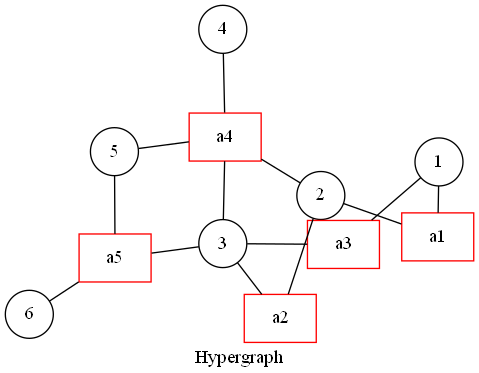

In [5]:
from IPython.display import Image
from fgglib.presentation.visualization import Visualization
from fgglib.fg.hypergraph import Hypergraph
from fgglib.fg.vertex import Vertex
from fgglib.fg.edge import Edge

hypergraph = Hypergraph()

#initialization of vertex with content and label
vertex1 = Vertex('1','1')
vertex2 = Vertex('2','2')
vertex3 = Vertex('3','3')
vertex4 = Vertex('4','4')
vertex5 = Vertex('5','5')
vertex6 = Vertex('6','6')

#addition of initialized vertices to the hypergraph
hypergraph.add_vertex(vertex1)
hypergraph.add_vertex(vertex2)
hypergraph.add_vertex(vertex3)
hypergraph.add_vertex(vertex4)
hypergraph.add_vertex(vertex5)
hypergraph.add_vertex(vertex6)

#initialization of edge with content
#(information of which vertices the edge connects) and label
#for each edge a target is defined the edge is connected with.
edge1 = Edge({'1', '2'},'a1')
edge1.add_target(vertex1)
edge1.add_target(vertex2)

edge2 = Edge({'2', '3'},'a2')
edge2.add_target(vertex2)
edge2.add_target(vertex3)

edge3 = Edge({'1', '3'},'a3')
edge3.add_target(vertex1)
edge3.add_target(vertex3)

edge4 = Edge({'2', '3', '4', '5'},'a4')
edge4.add_target(vertex2)
edge4.add_target(vertex3)
edge4.add_target(vertex4)
edge4.add_target(vertex5)

edge5 = Edge({'3', '5', '6'},'a5')
edge5.add_target(vertex3)
edge5.add_target(vertex5)
edge5.add_target(vertex6)

#addition of edges to the hypergraph
hypergraph.add_edge(edge1)
hypergraph.add_edge(edge2)
hypergraph.add_edge(edge3)
hypergraph.add_edge(edge4)
hypergraph.add_edge(edge5)


print(hypergraph.V)
print(hypergraph.E)

imgname="Hypergraph"
Visualization().draw(hypergraph, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

***

## Factor Graph

Now we create factor graphs that inherit the properties of hypergraph. Factor graph consists of graph nodes and factors. 
In this example we use the Tropical semiring.

We use example 3 from the paper to generate factor graph with the same notation. Vertices are drawn in circle and edges in rectangles connecting the vertices. <br> <br>
 <img src="https://github.com/jolee1101/misc/blob/main/fg_exp3.png?raw=true" width="450"/> <br>

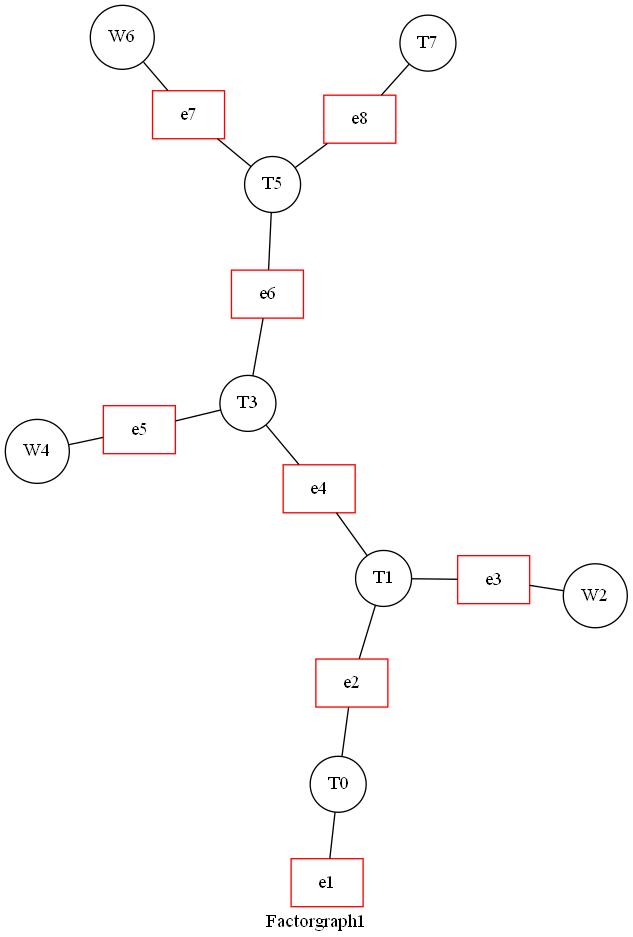

In [59]:
from fgglib.fg.factorgraph import Factorgraph
from fgglib.base.semiring import Tropical
from fgglib.fg.functions.discretedensity import DiscreteDensity
from fgglib.fg.variabledomain import VariableDomain
R=Tropical

#initialization of Factor graph with the Tropical semiring
fg = Factorgraph(R)

#Define vertexset and declar variable domain as finite
vertexSet = ('T0','T1','W2','T3','W4','T5','W6','T7')
domain = VariableDomain(False)
domain.set_content({0,1})

fg.createVertices(None, vertexSet, R, domain)

#For edges, we define the content, label, vertices
#to be conntected with, functions (described later) and the semiring.
fg.createEdge('BOS','e1', {'T0'}, R)
fg.createEdge('T1|T0','e2', {'T0','T1'}, R)
fg.createEdge('W2|T1','e3', {'T1','W2'}, R)
fg.createEdge('T3|T1','e4', {'T1','T3'}, R)
fg.createEdge('W4|T3','e5', {'T3','W4'}, R)
fg.createEdge('T5|T3','e6', {'T3','T5'}, R)
fg.createEdge('W6|T5','e7', {'T5','W6'}, R)
fg.createEdge('T7|T5','e8', {'T5','T7'}, R)

imgname="Factorgraph1"
Visualization().draw(fg, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

A factor graph can also have a function *F* that maps edge labels and FGGLIB provides three different function types: 
- circuit
- discrete density
- normal density functions

Below we use discrete density with numerical values to  calculate marginals.

0.16799999999999998


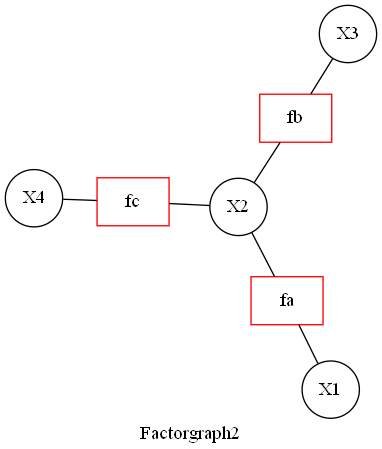

In [63]:
from fgglib.fg.variabledomain import VariableDomain
from fgglib.autotesting.testenvironment import *

#this time we define finite variable domain
domain = VariableDomain(False)
domain.set_content(({0,1}))

factorgraph2 = buildGraph(
    ['X1','X2','X3','X4'],
    {'fa':['X1','X2'],'fb':['X2','X3'],'fc':['X2','X4']},
    Real
)

factorgraph2.get_vertex('X1').domain = domain
factorgraph2.get_vertex('X2').domain = domain
factorgraph2.get_vertex('X3').domain = domain
factorgraph2.get_vertex('X4').domain = domain


#now we set a discret density function
factorgraph2.set_function(factorgraph2.get_edge('fa'), DiscreteDensity([[0.3, 0.2, 0.1],[0.3, 0, 0.1]]))
factorgraph2.set_function(factorgraph2.get_edge('fb'), DiscreteDensity([[0.3, 0.2],[0.3, 0],[0.1, 0.1]]))
factorgraph2.set_function(factorgraph2.get_edge('fc'), DiscreteDensity([[0.3, 0.2],[0.3, 0],[0.1, 0.1]]))


#and calculate normalization constant
print(factorgraph2.normalization_constant().score)


imgname="Factorgraph2"
Visualization().draw(factorgraph2, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

14
15
16
14
16
19
17
18


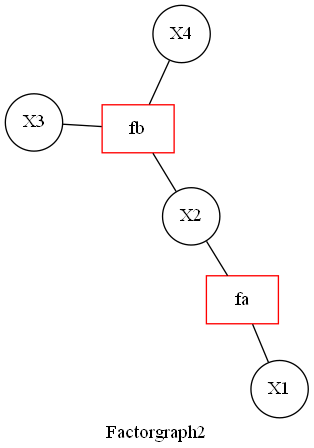

In [86]:
from fgglib.fg.functions.tropicalmul import TropicalMul

domain1 = VariableDomain(False)
domain1.set_content({1,2,3})
domain2 = VariableDomain(False)
domain2.set_content({4,5})

#another factor graph example using Tropical semiring
fgTropical = buildGraph(
    ['X1','X2','X3','X4'],
    {'fa':['X1','X2'],'fb':['X2','X3','X4']},
    Tropical
)

fgTropical.get_vertex('X1').domain = domain1
fgTropical.get_vertex('X2').domain = domain2
fgTropical.get_vertex('X3').domain = domain1
fgTropical.get_vertex('X4').domain = domain2

fgTropical.set_function(fgTropical.get_edge('fa'), TropicalMul(2))
fgTropical.set_function(fgTropical.get_edge('fb'), TropicalMul(3))

marginals = fgTropical.sum_product()
print(marginals[fgTropical.get_vertex('X1')].compute(1).score)
print(marginals[fgTropical.get_vertex('X1')].compute(2).score)
print(marginals[fgTropical.get_vertex('X1')].compute(3).score)
print(marginals[fgTropical.get_vertex('X2')].compute(4).score)
print(marginals[fgTropical.get_vertex('X2')].compute(5).score)
print(marginals[fgTropical.get_vertex('X3')].compute(6).score)
print(marginals[fgTropical.get_vertex('X4')].compute(7).score)
print(marginals[fgTropical.get_vertex('X4')].compute(8).score)

imgname="Factorgraph2"
Visualization().draw(fgTropical, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

## Factor Graph Grammars

FGG is a 4-Tuple <T,N,S,P> where:
- *N* is a finite set of nonterminal symbols
- *S* is a string (or label) for the starting nonterminal
- *T* is a finite set of terminal symbols (corresponds to factor graph fragments in our library)
- *P* is a finite set of production rules of the form (*X* ➝ *R*), where *X* is an element of nonterminal N and R is a factor graph fragment with edge labels in *N* ∪ *T*

Here, we create an FGG for derivations of a CFG in Chomsky Normal Form which was presented in lecture note 6.

<img src="https://github.com/jolee1101/misc/blob/main/the_big_male.png?raw=true" width="130"/> <br> <br>

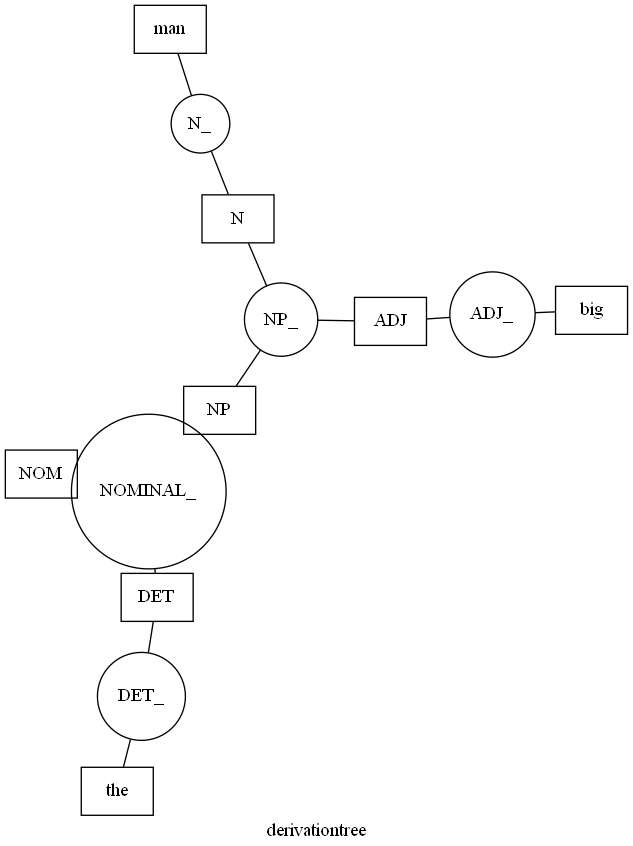

In [87]:
from fgglib.fgg.fgg import FGG
from fgglib.fgg.production import Production
from fgglib.fg.fragment import Fragment
frag=Fragment()

#for each nontermial we build a fragment
nominal = frag.buildFragment(
    {'NOM','DET', 'NP'}, # V
    [('NOMINAL_', {'NOM','DET', 'NP'})], # E
    {'DET', 'NP'}, # ext
)

determinant = frag.buildFragment(
    {'DET', 'the'}, # V
    [('DET_', {'DET','the'})], # E
    {'the'}, # ext
)

nounphrase = frag.buildFragment(
    {'NP', 'ADJ', 'N'}, # V
    [('NP_', {'NP', 'ADJ','N'})], # E
    {'ADJ','NP'}, # ext
)

adj = frag.buildFragment(
     {'ADJ', 'big'}, # V
    [('ADJ_', {'ADJ','big'})], # E
    {'big'}, # ext
)

noun = frag.buildFragment(
    {'N', 'man'}, # V
    [('N_', {'N','man'})], # E
    {'man'}, # ext
)

#this derivation tree contains CFG and can build a derivation tree
derivationtree = FGG({nominal,determinant, nounphrase, adj, noun}, # T
    {'NOMINAL','DET', 'NP', 'ADJ', 'N'}, # N
    {'NOMINAL'}, # S
    {Production('S', nominal),
     Production('Det', determinant),
     Production('NP', nounphrase),
     Production('Adj', adj),
     Production('N', noun)} # P
)

imgname="derivationtree"
Visualization().draw(derivationtree, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

***

## Conjunction

For conjunction we continue to use the example of "the big male" from the previous part: "derivationtree" and "noun" are conjoined in order to calculate the marginal distribution of the noun "male". As a result of conjunction a new FGG is returned with conjoined pairs of rules.

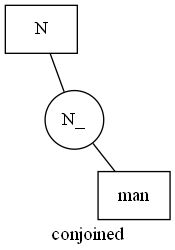

In [88]:
nounFGG = FGG(
    {noun}, # T
    {'X'}, # N
    'S', # S
    {Production('X',noun)} # P
)

conjoined = derivationtree.conjunction(nounFGG)
imgname = str("conjoined")
Visualization().draw(conjoined, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


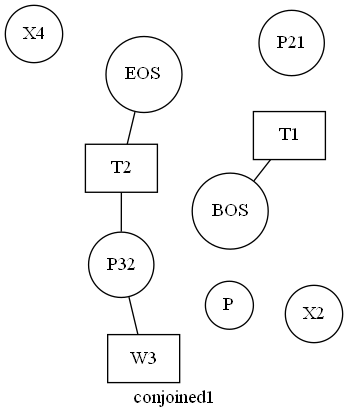

In [89]:
#another example of conjunction

frag1 = buildFragment(
    {'T1', 'T2'}, # V
    [('P', {'T1','T2'}), ('EOS', {'T2'})], # E
    {'T1'} # ext
)

frag2 = buildFragment(
    {'T1'},
    [('BOS',{'T1'}),('X2',{'T1'})],
    {}
)

frag3 = buildFragment(
    {'T1','T2','W3'},
    [('P21',{'T1','T2'}),('P32',{'T2','W3'}),('X4',{'T2'})],
    {'T1'}
)

frag4 = buildFragment(
    {'T1','T2'}, # V
    [], # E
    {'T1'} # ext
)

frag5 = buildFragment(
    {'T1'},
    [('(0)2',{'T1'})],
    {}
)

frag6 = buildFragment(
    {'T1','T2','W3'},
    [('(i)4',{'T2'}),('wi',{'W3'})],
    {'T1'}
)

conFGG1 = FGG(
    {frag1,frag2,frag3}, # T
    {'S','X','X4','X2'}, # N
    'S', # S
    {Production('X',frag1),
     Production('S',frag2),
     Production('X',frag3)} # P
)

imgname = str("conjoined1")
Visualization().draw(conFGG1, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


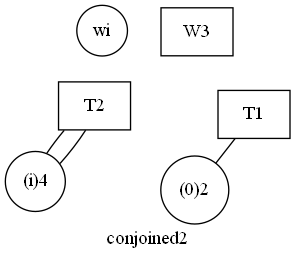

In [90]:
#FGG to be conjoined with the above example
conFGG2 = FGG(
    {frag4,frag5,frag6}, # T
    {'(n)','S','(i-1)','(i)4','(0)2'}, # N
    'S', # S
    {Production('(n)',frag4),
     Production('S',frag5),
     Production('(i-1)',frag6)} # P
)

imgname = str("conjoined2")
Visualization().draw(conFGG2, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


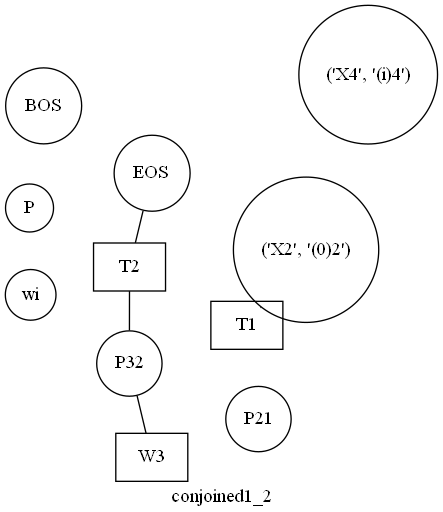

In [92]:
conjoined1_2= conFGG1.conjunction(conFGG2)

imgname = str("conjoined1_2")
Visualization().draw(conjoined1_2, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)

***
## Inference

FGGLIB also performs inferences. It distinguishes three cases:
1. finite variable domains, infinite graph language 
2. infinite varaible domains, finite graph languages, 
3. inifite variable domains, inifite graph languages, 

In order to determine which algorithm to use, the library offers methods to check the characteristics of FGG:
- recursive or nonrecursive
- nonliearly recursive or linearly recursive
- nonreentrant


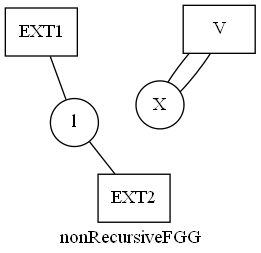

In [161]:
from fgglib.fgg.fggsum_product import FGGsum_product

#similar to the previous examples
#we build fragments to build a FGG
recFrag1 = buildFragment(
    {'EXT1', 'EXT2'}, # V
    [('l', {'EXT1','EXT2'})], # E
    {'EXT1','EXT2'}, # ext
)

recFragp = buildFragment(
    {'V'}, # V
    [('X', {'V'})], # E
    {}, # ext
)
recFragp.get_edge('X').add_target(recFragp.get_vertex('V')) # workaround for edge assignment of the test environment

#after building fragments FGG is generated.
nonRecFGG = FGG(
    {recFrag1, recFragp}, # T
    {'S','X'}, # N
    'S', # S
    {Production('S',recFragp),
     Production('X',recFrag1)}, # P
)

domain = VariableDomain(False)
domain.set_content({0.5})

nonRecFGG.set_variable_domain('V',domain)
nonRecFGG.set_variable_domain('EXT1',domain)
nonRecFGG.set_variable_domain('EXT2',domain)

imgname = str("nonRecursiveFGG")
Visualization().draw(nonRecFGG, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


In [166]:
#Inference of the above example
fggsp = FGGsum_product(nonRecFGG)
print("Inference: "+str(fggsp.inference()))

#checks to determine recursion and reentrance
print("FGG is recursive? :" + str(nonRecFGG.recursive()))
print("FGG is linearly recursive? :" + str(nonRecFGG.linearly_recursive()))
print("FGG is linearly reentrant? :" + str(nonRecFGG.reentrant()))

Inference: 0.25
FGG is recursive? :False
FGG is linearly recursive? :False
FGG is linearly reentrant? :False


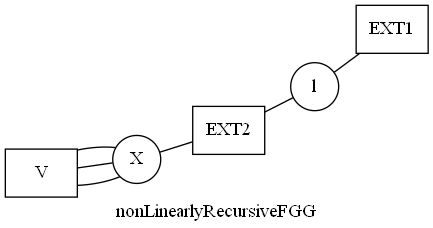

In [163]:
recFrag0 = buildFragment(
    {'EXT1', 'EXT2'}, # V
    [('X', {'EXT1','EXT2'})], # E
    {'EXT1','EXT2'}, # ext
)

recFrag1 = buildFragment(
    {'EXT1', 'EXT2'}, # V
    [('l', {'EXT1','EXT2'})], # E
    {'EXT1','EXT2'}, # ext
)

recFragp = buildFragment(
    {'V'}, # V
    [('X', {'V','V'})], # E
    {}, # ext
)
recFragp.get_edge('X').add_target(recFragp.get_vertex('V')) # workaround for edge assignment of the test environment

nonlinRecFrag1 = buildFragment(
    {'EXT1', 'EXT2', 'V'}, # V
    [('X', {'EXT1','V'}), ('X',{'V','EXT2'})], # E
    {'EXT1','EXT2'}, # ext
)

domain = VariableDomain(False)
domain.set_content({0.5})

nonlinRecFGG = FGG(
    {recFrag0, recFrag1, nonlinRecFrag1}, # T
    {'S','X'}, # N
    'S', # S
    {Production('S',recFragp),
     Production('X',nonlinRecFrag1),
     Production('X',recFrag1)} # P
)
nonlinRecFGG.set_variable_domain('V',domain)
nonlinRecFGG.set_variable_domain('EXT1',domain)
nonlinRecFGG.set_variable_domain('EXT2',domain)

imgname = str("nonLinearlyRecursiveFGG")
Visualization().draw(nonlinRecFGG, imgname)
Image("./fgglib/presentation/images/"+imgname+str(".png"), width=150)


In [167]:
#Inference of the above example
fggsp = FGGsum_product(nonlinRecFGG)
print("Inference: "+str(fggsp.inference()))

#checks to determine recursion and reentrance
print("FGG is recursive? :" + str(nonlinRecFGG.recursive()))
print("FGG is linearly recursive? :" + str(nonlinRecFGG.linearly_recursive()))
print("FGG is linearly reentrant? :" + str(nonlinRecFGG.reentrant()))

equation: [(-1, 0, 1), (-1, 1, 1)]
equation: [(-1, 1, 1), (1, 2, 1)]
equation: [(-1, 2, 1), (-1, 3, 1), (-1, 4, 1)]
equation: [(-1, 3, 1), (1, 2, 2)]
equation: [(-1, 4, 1), (0.25, 0, 0)]
{'phiS[]': 0, 'tau[Graph: {Vertex: V} | {Edge X: [Vertex: V, Vertex: V]}][]': 1, 'phiX[0.5, 0.5]': 2, 'tau[Graph: {Vertex: EXT1, Vertex: V, Vertex: EXT2} | {Edge X: [Vertex: V, Vertex: EXT1], Edge X: [Vertex: EXT2, Vertex: V]}][0.5, 0.5]': 3, 'tau[Graph: {Vertex: EXT1, Vertex: EXT2} | {Edge l: [Vertex: EXT2, Vertex: EXT1]}][0.5, 0.5]': 4}
[ 0.5  -0.5  -0.5   0.25  0.25]
Inference: 0.5
FGG is recursive? :True
FGG is linearly recursive? :False
FGG is linearly reentrant? :True
